# Ensembles

<h3> План семинара </h3>

* **Bagging** 
 - Bootstrap
 - Как построить доверительный интревал с помощью bootstrap
 - Описание композиции Bagging
 - Bagging в применении в DT

* **Bias-vairance trade-off**
  - Разложение ошибки на Bias и Variance
  - bias\variance для bagging и boosting
    
* **Random Forest** 
 - Алгоритм построения случайного леса
 - Применение RandomForest на реальной задаче (предсказание оттока клиентов)
 - Out-of-bag error
 
* **Основные выводы** 

In [3]:
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score


### Bootstrap

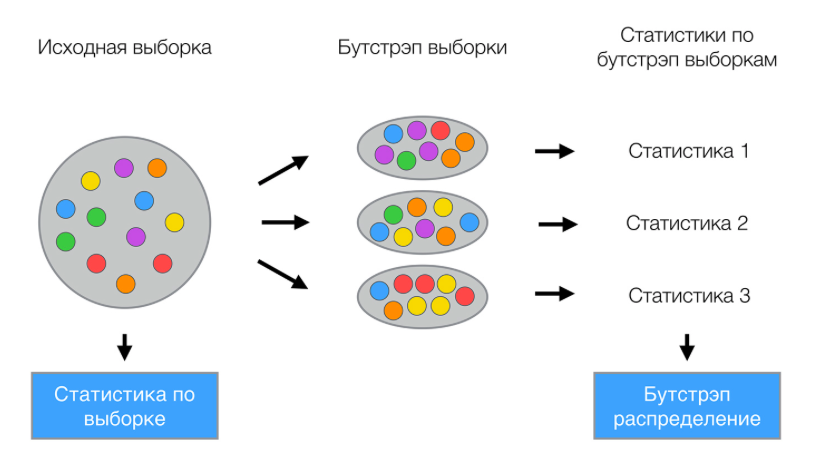
**Важно!**
    - Бутстрепная выборка имеет такой же размер, что и исходная
    - Генерация с повторениями

# Bagging
## $$a_{Bagging}(x) = \frac{1}{M}\sum_{i=1}^M a_i(x)$$

$a_i(x)$ - обучен на бутстреп-выборке $X^i$
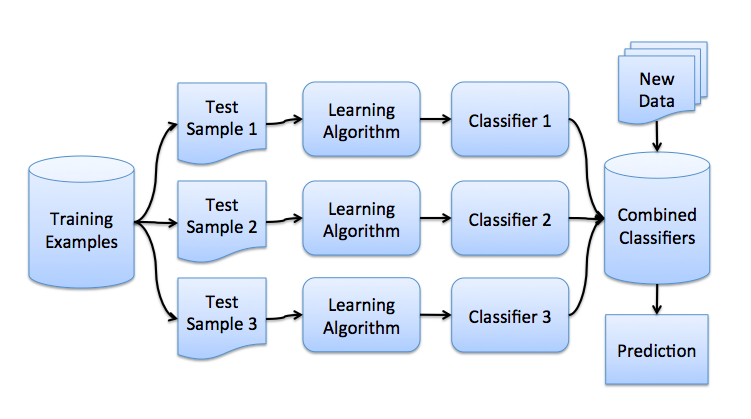

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

f = X.shape[1] # Количество параметров

rnd_d3 = DecisionTreeClassifier(max_features=int(f**0.5)) #random splits
d3 = DecisionTreeClassifier()

In [8]:
print(f"Decision tree : {cross_val_score(d3, X, y).mean()}")
print(f"Bagging : {cross_val_score(BaggingClassifier(d3), X, y).mean()}")
print(f"Randomized Bagging : {cross_val_score(BaggingClassifier(rnd_d3), X, y).mean()}")

Decision tree : 0.9533333333333334
Bagging : 0.9466666666666667
Randomized Bagging : 0.9533333333333334


### Bias\variance для Bagging

Рассмотрим задачу регрессии с базовыми алгоритмами $b_1(x), .. ,b_n(x)$. Предположим, что существует истинная функция ответа для всех объектов $y(x)$, а также задано распределение на объектах $p(x)$. В этом случае мы можем записать ошибку каждой функции регрессии:

$$\varepsilon_i(x) = b_i(x) - y(x), i=1,..,n$$

Средняя ошибка построенных функций регрессии имеет вид:
    $$E_1 = \dfrac{1}{n} E_x \varepsilon_i^2(x)$$

Предположим, что ошибки несмещены и некоррелированы:
    $$E_x \varepsilon_i(x) = 0$$
    $$E_x \varepsilon_i(x) \varepsilon_j(x) = 0, i \neq j$$

Построим теперь новую функцию регрессии, которая будет усреднять ответы построенных нами функций:
    $$a(x) = \dfrac{1}{n} \sum_{i=1}^n b_i(x)$$

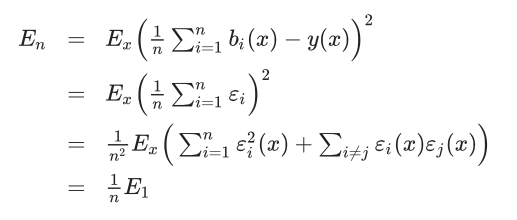

### Random Forest

##### Алгоритм построения случайного леса из $N$ деревьев

Для каждого $n = 1..N$:

Сгенерировать выборку $X_n$ с помощью бутстрэпа;
Построить решающее дерево $b_n$ по выборке $X_n$:
* по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
* дерево строится, пока в каждом листе не более $n_{min}$ объектов или пока не достигнем определенной высоты дерева
* при каждом разбиении сначала выбирается $m$ случайных признаков из $n$ исходных, и оптимальное разделение выборки ищется только среди них.  
Итоговый классификатор:
    $ a(x) = \frac{1}{N} \sum_{i=1}^{N}b_i(x) $  
    $m$ советуют выбирать равным:
- $\sqrt{n}$ для классификации
- $\dfrac{n}{3}$ для регрессии